# Problem 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
%matplotlib inline
np.seterr(invalid='ignore', over='ignore')  # suppress warning caused by division by inf

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
def f(x):
    return 1/(1 + np.exp(3*(x-3))) * 10 * x**2  + 1 / (1 + np.exp(-3*(x-3))) * (0.5*(x-10)**2 + 50)

def fprime(x):
    return 1 / (1 + np.exp((-3)*(x-3))) * (x-10) + 1/(1 + np.exp(3*(x-3))) * 20 * x + (3* np.exp(9))/(np.exp(9-1.5*x) + np.exp(1.5*x))**2 * ((0.5*(x-10)**2 + 50) - 10 * x**2) 

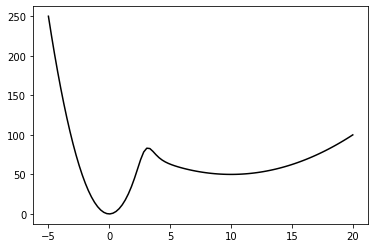

In [3]:
x = np.linspace(-5,20,100)
plt.rcParams["figure.figsize"] = [5, 4]
plt.plot(x,f(x), 'k')
plt.show()

In [4]:
def GD(alpha, start_x, iteration_count):
    x = [start_x]
    y = [f(start_x)]
    for _ in range(iteration_count - 1):
        x.append(x[-1] - alpha * fprime(x[-1]))
        y.append(f(x[-1]))
    return x, y

def GD_plot_alpha(alpha, sample_count, iteration_count):
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.rc('font', size = 14)
    plt.rcParams["figure.figsize"] = [10, 4]
    plt.rcParams["figure.autolayout"] = True
    fig, axs = plt.subplots(1, 2)
    fig.suptitle('Learning Rate = {alpha}'.format(alpha=alpha))
    for _ in range(sample_count):
        x, y = GD(alpha, rd.uniform(-5, 20), iteration_count)
        axs[0].plot(list(range(iteration_count)), x)
        axs[0].set(xlabel='Iterations', ylabel=r'$\theta^k$')
        axs[1].plot(list(range(iteration_count)), y)
        axs[1].set(xlabel='Iterations', ylabel=r'$f\left(\theta^k\right)$')
    plt.show()

In the case of $\alpha = 0.01$, starting points that are relatively large converge to the wide minimum, and others converge to the sharp minimum.

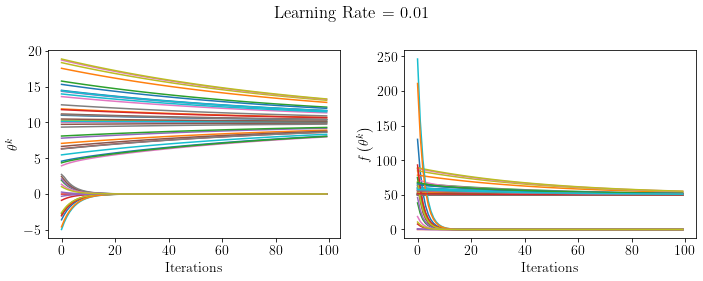

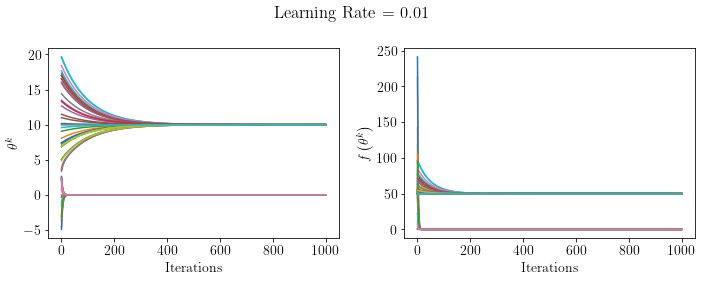

In [5]:
GD_plot_alpha(0.01, 50, 100)
GD_plot_alpha(0.01, 50, 1000)

In the case of $\alpha = 0.3$, all cases converge to the wide minimum.

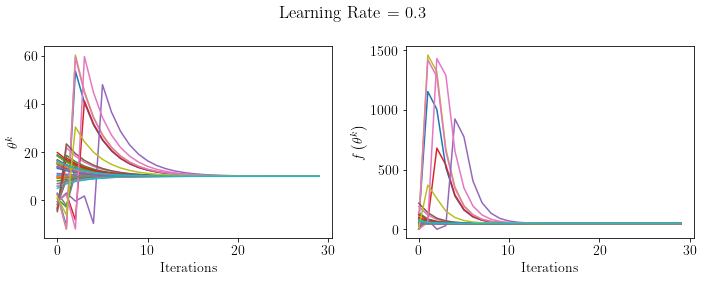

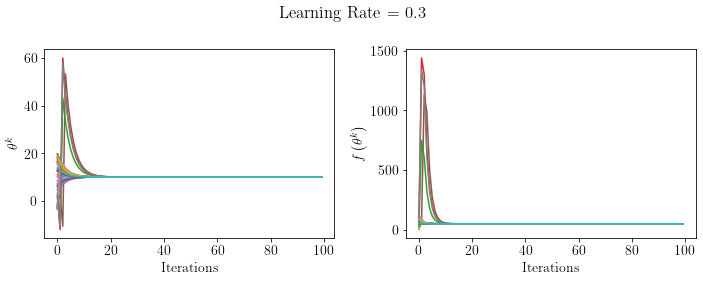

In [6]:
GD_plot_alpha(0.3, 50, 30)
GD_plot_alpha(0.3, 50, 100)

In the case of $\alpha = 4$, most cases do not converge.

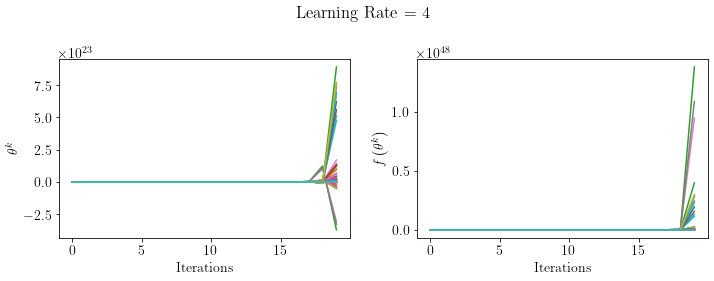

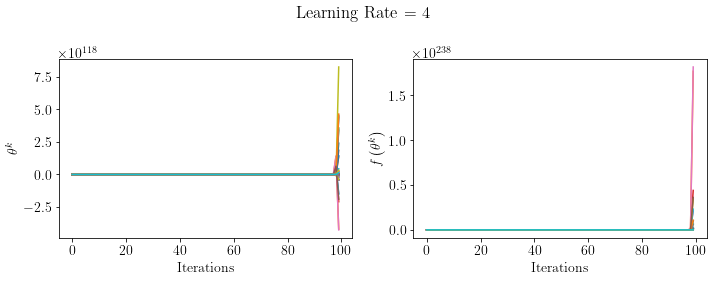

In [7]:
GD_plot_alpha(4, 50, 20)
GD_plot_alpha(4, 50, 100)

# Problem 5

In [8]:
import numpy as np

In [9]:
class Convolution1d :
    def __init__(self, filt) :
        self.__filt = filt
        self.__r = filt.size
        self.T = TransposedConvolution1d(self.__filt)

    def __matmul__(self, vector) :
        r, n = self.__r, vector.size
        
        return np.asarray([sum([self.__filt[v] * vector[h + v] for v in range(r)]) for h in range(n - r + 1)])
    
class TransposedConvolution1d :
    '''
    Transpose of 1-dimensional convolution operator used for the 
    transpose-convolution operation A.T@(...)
    '''

    def __init__(self, filt) :
        self.__filt = filt
        self.__r = filt.size

    def __matmul__(self, vector) :
        r = self.__r
        n = vector.size + r - 1

        return np.asarray([sum([self.__filt[v] * vector[h - v] for v in range(max(0, h - n + r), min(r, h + 1))]) for h in range(n)])

In [10]:
def huber_loss(x) :
    return np.sum( (1/2)*(x**2)*(np.abs(x)<=1) + (np.sign(x)*x-1/2)*(np.abs(x)>1) )
    
def huber_grad(x) :
    return x*(np.abs(x)<=1) + np.sign(x)*(np.abs(x)>1)

In [11]:
r, n, lam = 3, 20, 0.1

np.random.seed(0)
k = np.random.randn(r)
b = np.random.randn(n-r+1)
A = Convolution1d(k)

x = np.zeros(n)
alpha = 0.01
for _ in range(100) :
    x = x - alpha*(A.T@(huber_grad(A@x-b))+lam*x)

print(huber_loss(A@x-b)+0.5*lam*np.linalg.norm(x)**2)

0.4587586843129764
